## Good Python Practices

This section includes some best practices to write Python code. 

### Write Meaningful Names

It is a bad practice to use vague names such as `x`, `y`, `z` in your Python code since they don't give you any information about their roles in the code. 

In [1]:
x = 10 
y = 5 
z = x + y  

Write declarative variables names instead. You can also add type hints to make the types of these variables more obvious.  

In [3]:
num_members: int = 10
num_guests: int = 5
sum_: int = num_members + num_guests  

### Assign Names to Values

It can be confusing for others to understand the roles of  some values in your code.

In [4]:
circle_area = 3.14 * 5**2

Thus, it is a good practice to assign names to your variables to make them readable to others. 

In [5]:
PI = 3.14
RADIUS = 5

circle_area = PI * RADIUS**2

### Name Complex Conditions to Make Your Code More Readable

Consider naming your conditions if your if-else statement is too complex. Doing so will improve the readability of your code.

In [21]:
# Confusing

x = -10
y = 5

if (x % 2 == 0 and x < 0) and (y % 2 != 0 and y > 0):
    print("Both conditions are true!")
else:
    print("At least one condition is false.")


Both conditions are true!


In [22]:
# Clearer

x = -10
y = 5

# Assign names to conditions
x_is_even_and_negative = x % 2 == 0 and x < 0
y_is_odd_and_positive = y % 2 != 0 and y > 0

if (x_is_even_and_negative) and (y_is_odd_and_positive):
    print("Both conditions are true!")
else:
    print("At least one condition is false.")


Both conditions are true!


### Avoid Duplication in Your Code

While writing code, we should avoid duplication because:
- It is redundant
- If we make a change to one piece of code, we need to remember to make the same change to another piece of code. Otherwise, we will introduce bugs into our code.

In the code below, we use the filter `X['date'] > date(2021, 2, 8)` twice. To avoid duplication, we can assign the filter to a variable, then use that variable to filter other arrays.

In [ ]:
import pandas as pd 
from datetime import date

df = pd.DataFrame({'date': [date(2021, 2, 8), date(2021, 2, 9), date(2021, 2, 10)],
									'val1': [1,2,3], 'val2': [0,1,0]})
X, y = df.iloc[:, :1], df.iloc[:, 2]

# Instead of this
subset_X = X[X['date'] > date(2021, 2, 8)]
subset_y = y[X['date'] > date(2021, 2, 8)]

# Do this
filt = df['date'] > date(2021, 2, 8)
subset_X = X[filt]
subset_y = y[filt]

### Underscore(_): Ignore Values That Will Not Be Used

When assigning the values returned from a function, you might want to ignore some values that are not used in future code. If so, assign those values to underscores `_`.

In [1]:
def return_two():
    return 1, 2

_, var = return_two()
var

2

### Underscore “_”: Ignore The Index in Python For Loops

If you want to repeat a loop a specific number of times but don’t care about the index, you can use `_`. 

In [2]:
for _ in range(5):
    print('Hello')

Hello
Hello
Hello
Hello
Hello


### slice: Make Your Indices More Readable by Naming Your Slice

Have you ever found it difficult to understand code that uses hardcoded slice indices? 
For example, in this code, It's impossible to discern the meanings of `prices[:4]` and `prices[4:]` without additional context or comments in the code.

In [4]:
prices = [5, 3, 5, 4, 5, 3, 3.5, 3]

price_difference = sum(prices[:4]) - sum(prices[4:])
price_difference

2.5

To make your code more transparent and easier to maintain, consider naming your slice objects using Python's built-in slice function. 

By using named slices like this, you can instantly see that the values in the indices from 0 to 4 are in January, while the rest of the values are in February. 

In [ ]:
JANUARY = slice(0, 4)
FEBRUARY = slice(4, len(prices))
price_difference = sum(prices[JANUARY]) - sum(prices[FEBRUARY])
price_difference

2.5

### Python Pass Statement

If you want to create code that does a particular thing but don’t know how to write that code yet, put that code in a function then use `pass`.

Once you have finished writing the code in a high level, start to go back to the functions and replace `pass` with the code for that function. This will prevent your thoughts from being disrupted. 

In [ ]:
def say_hello():
    pass 

def ask_to_sign_in():
    pass 

def main(is_user: bool):
    if is_user:
        say_hello()
    else:
        ask_to_sign_in()

main(is_user=True)

### Stop using = operator to create a copy of a Python list. Use copy method instead

When you create a copy of a Python list using the `=` operator, a change in the new list will lead to the change in the old list. It is because both lists point to the same object.

In [7]:
l1 = [1, 2, 3]
l2 = l1 
l2.append(4)

In [8]:
l2 

[1, 2, 3, 4]

In [9]:
l1 

[1, 2, 3, 4]

Instead of using `=` operator, use `copy()` method. Now your old list will not change when you change your new list. 

In [10]:
l1 = [1, 2, 3]
l2 = l1.copy()
l2.append(4)

In [11]:
l2 

[1, 2, 3, 4]

In [12]:
l1

[1, 2, 3]

### deepcopy: Copy a Nested Object

If you want to create a copy of a nested object, use `deepcopy`. While `copy` creates a shallow copy of the original object, `deepcopy` creates a deep copy of the original object. This means that if you change the nested children of a shallow copy, the original object will also change. However, if you change the nested children of a deep copy, the original object will not change.

In [1]:
from copy import deepcopy

l1 = [1, 2, [3, 4]]
l2 = l1.copy() # Create a shallow copy

In [2]:
l2[0] = 6
l2[2].append(5)
l2 

[6, 2, [3, 4, 5]]

In [3]:
# [3, 4] becomes [3, 4, 5]
l1 

[1, 2, [3, 4, 5]]

In [4]:
l1 = [1, 2, [3, 4]]
l3 = deepcopy(l1) # Create a deep copy

In [5]:
l3[2].append(5)
l3  

[1, 2, [3, 4, 5]]

In [6]:
# l1 stays the same
l1 

[1, 2, [3, 4]]

### Avoid Side Effects When Using List in a Function

When using a Python list as an argument in a function, you might inadvertently change its value. 

For example, in the code below, using the `append` method ends up changing the values of the original list. 

In [1]:
def append_four(nums: list):
    nums.append(4)
    return nums 

In [2]:
a = [1, 2, 3]
b = append_four(a)

In [3]:
a 

[1, 2, 3, 4]

If you want to avoid this side effect, use `copy` with a list or `deepcopy` with a nested list in a function. 

In [12]:
def append_four(nums: list):
    nums1 = nums.copy()
    nums1.append(4)
    return nums1 

In [13]:
a = [1, 2, 3]
b = append_four(a)
a 

[1, 2, 3]

### Avoiding Surprises with Mutable Default Arguments in Python

Mutable default arguments in Python functions can lead to surprising and often unintended consequences. Consider this example:

In [1]:
def add_to_dataset(new_data, dataset=[]):
    dataset.append(new_data)
    return dataset


result1 = add_to_dataset(5)
print(f"After adding 5: {result1}")


result2 = add_to_dataset(10)
print(f"After adding 10: {result2}")

After adding 5: [5]
After adding 10: [5, 10]


The empty list `[]` default argument is created once at function definition, not each function call. This causes subsequent calls to modify the same list, leading to surprising results and potential data processing bugs.

To avoid this issue, use `None` as the default argument and create a new list inside the function:

In [2]:
def add_to_dataset(new_data, dataset=None):
    if dataset is None:
        dataset = []
    dataset.append(new_data)
    return dataset


result1 = add_to_dataset(5)
print(f"After adding 5: {result1}")


result2 = add_to_dataset(10)
print(f"After adding 10: {result2}")

After adding 5: [5]
After adding 10: [10]


This approach ensures that a new list is created for each function call unless explicitly provided.

By avoiding mutable defaults, you ensure that each function call starts with a clean slate, preventing unexpected side effects and making your code more predictable.

### Enumerate: Get Counter and Value While Looping


Are you using `for i in range(len(array))` to access both the index and the value of the array? If so, use `enumerate` instead. It produces the same result but it is much cleaner. 

In [13]:
arr = ['a', 'b', 'c', 'd', 'e']

# Instead of this
for i in range(len(arr)):
    print(i, arr[i])

0 a
1 b
2 c
3 d
4 e


In [14]:
# Use this
for i, val in enumerate(arr):
    print(i, val)

0 a
1 b
2 c
3 d
4 e


### Don't Use Multiple OR Operators. Use in Instead

It is lengthy to write multiple OR operators. You can shorten your conditional statement by using `in` instead. 

In [1]:
a = 1 

if a == 1 or a == 2 or a == 3:
    print("Found one!")

Found one!


In [2]:
if a in [1, 2, 3]:
    print("Found one!")

Found one!


### Stop Using `+` to Concatenate Strings. Use Join Instead 

It is more efficient to concatenate strings using the `join` method than the `+` operator.

The code below shows the difference in performance between the two approaches.

In [7]:
from random import randint
chars = [str(randint(0, 1000)) for _ in range(10000)]

In [8]:
%%timeit

text = ""
for char in chars:
    text += char

411 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%%timeit

text = "".join(chars)

60.5 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### A Function Should Only Do One Task

To make code clearer and easier to maintain, functions should only do one task at a time. However, the function `process_data` violates this principle by performing multiple tasks, such as adding new features, adding 1 to a column, and summing all columns. 

Although comments can be used to explain each block of code, it can be difficult to keep them updated, and testing each unit of code inside a function can be challenging.

In [11]:
import pandas as pd

data = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})


In [12]:
def process_data(df: pd.DataFrame):
    # Create a copy
    data = df.copy()

    # Add new features
    data["c"] = [1, 1, 1]

    # Add 1
    data["a"] = data["a"] + 1

    # Sum all columns
    data["sum"] = data.sum(axis=1)
    return data


In [13]:
process_data(data)

,a,b,c,sum
0,2,4,1,7
1,3,5,1,9
2,4,6,1,11


A better approach is to split the `process_data` function into smaller functions, each of which performs only one task. The revised code accomplishes this by creating four separate function. These functions are then applied to the DataFrame using the `pipe` method in a specific order to achieve the desired output.

Now, the revised code is easier to comprehend and test.

In [17]:
def create_a_copy(df: pd.DataFrame):
    return df.copy()


def add_new_features(df: pd.DataFrame):
    df["c"] = [1, 1, 1]
    return df


def add_one(df: pd.DataFrame):
    df["a"] = df["a"] + 1
    return df


def sum_all_columns(df: pd.DataFrame):
    df["sum"] = df.sum(axis=1)
    return df


(data
    .pipe(create_a_copy)
    .pipe(add_new_features)
    .pipe(add_one)
    .pipe(sum_all_columns)
)


,a,b,c,sum
0,2,4,1,7
1,3,5,1,9
2,4,6,1,11


### A Function Should Have Fewer Than Four Arguments

Having multiple function parameters can result in code that is hard to maintain, difficult to read, and prone to errors when passing arguments in the wrong order. 

To demonstrate this, start by creating two different datasets.



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Generate sample time series data
np.random.seed(42)

# Dataset 1: Stock-like price movements
n_points = 100
trend1 = np.linspace(100, 150, n_points)
noise1 = np.cumsum(np.random.normal(0, 1, n_points))
stock_prices = trend1 + noise1

# Dataset 2: Seasonal pattern with noise
t = np.linspace(0, 4*np.pi, n_points)
seasonal_data = 10 * np.sin(t) + np.random.normal(0, 1, n_points)


Now, let's define the `plot_time_series` function with many arguments.

In [9]:
def plot_time_series(
    data,
    x_label: str,
    y_label: str,
    title: str,
    line_color: str = "blue",
    line_width: float = 1.5,
    marker: str = "o",
    marker_size: int = 6,
    grid: bool = True,
):
    plt.style.use("dark_background")
    plt.plot(
        data,
        color=line_color,
        linewidth=line_width,
        marker=marker,
        markersize=marker_size,
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if grid:
        plt.grid(True)
    plt.show()

If we want to reuse the same function with the same style for different datasets, we will have to pass all the arguments again.

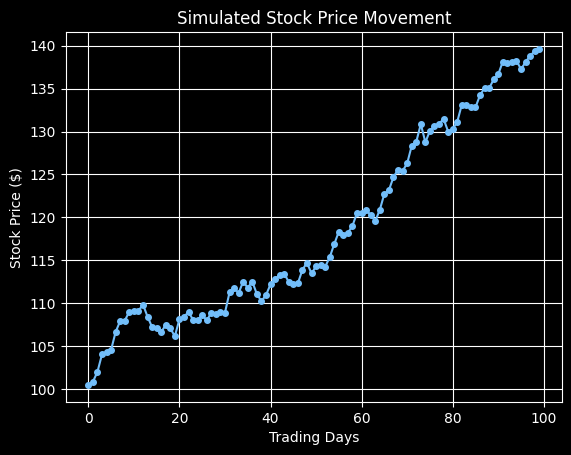

In [11]:
plot_time_series(
    data=stock_prices,
    x_label="Trading Days",
    y_label="Stock Price ($)",
    title="Simulated Stock Price Movement",
    line_color="#72BEFA",
    line_width=1.5,
    marker=".",
    marker_size=8,
    grid=True,
)

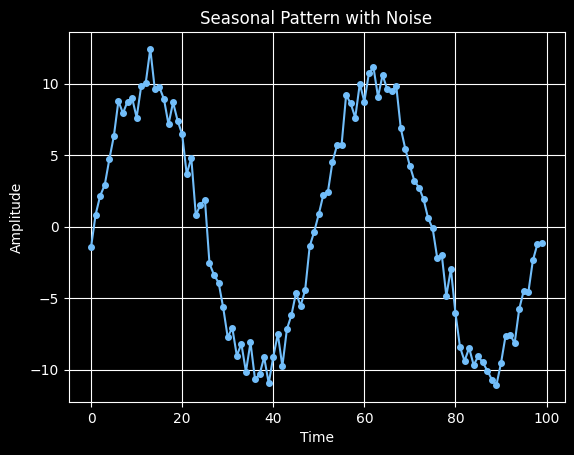

In [13]:
plot_time_series(
    data=seasonal_data,
    x_label="Time",
    y_label="Amplitude",
    title="Seasonal Pattern with Noise",
    line_color="#72BEFA",
    line_width=1.5,
    marker=".",
    marker_size=8,
    grid=True,
)

Dataclasses are a simple way to create classes that mainly hold data. We can use dataclasses to simplify the function parameters.

In [22]:
from dataclasses import dataclass


@dataclass
class PlotStyle:
    line_color: str = "#72BEFA"
    line_width: float = 1.5
    marker: str = "."
    marker_size: int = 8
    grid: bool = True

We can now modify the `plot_time_series` function to accept a `PlotStyle` object.

In [24]:
def plot_time_series(
    data, x_label: str, y_label: str, title: str, style: PlotStyle = PlotStyle()
):
    plt.plot(
        data,
        color=style.line_color,
        linewidth=style.line_width,
        marker=style.marker,
        markersize=style.marker_size,
    )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if style.grid:
        plt.grid(True)
    plt.show()

With the use of dataclasses, we can create a custom style once and reuse it for multiple plots.

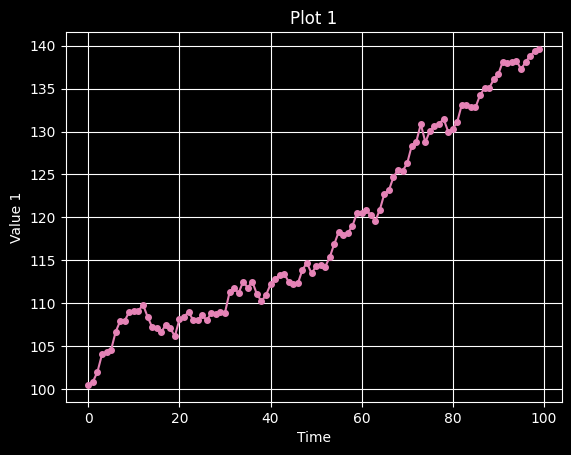

In [25]:
# Create a custom style once and reuse it
custom_style = PlotStyle(line_color="#E583B6", marker=".", marker_size=8)

# Use the style for multiple plots
plot_time_series(stock_prices, "Time", "Value 1", "Plot 1", custom_style)

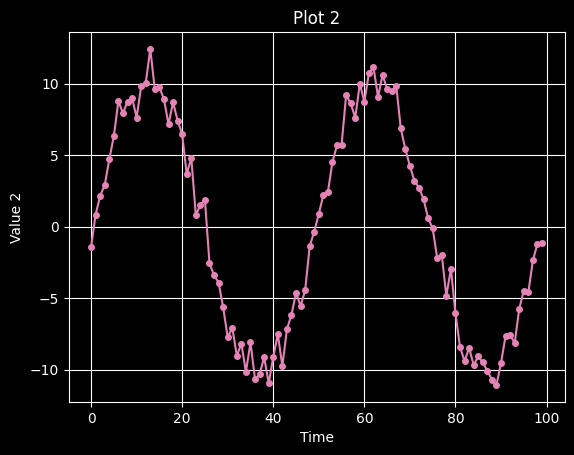

In [21]:
plot_time_series(seasonal_data, "Time", "Value 2", "Plot 2", custom_style)

By using dataclasses, we can avoid passing multiple arguments to the function and make the code more maintainable.

### Avoid Using Flags as a Function's Parameters

A function should only do one thing. If flags are used as a function's parameters, the function is doing more than one thing.

In [2]:
def get_data(is_csv: bool, name: str):
    if is_csv:
        df = pd.read_csv(name + '.csv')
    else:
        df = pd.read_pickle(name + '.pkl')
    return df  

When you find yourself using flags as a way to run different code, consider splitting your function into different functions.

In [ ]:
def get_csv_data(name: str):
    return pd.read_csv(name + '.csv')

def get_pickle_data(name: str):
    return pd.read_pickle(name + '.pkl')

### Condense an If-Else Statement into One Line

If your if-else statement is short, you can condense it into one line for readability. 

In [2]:
purchase = 20

# if-else statement in several lines
if purchase > 100:
    shipping_fee = 0
else: 
    shipping_fee = 5
shipping_fee

5

In [3]:
# if-else statement in one line

shipping_fee = 0 if purchase > 100 else 5 
shipping_fee

5

### Efficiently Checking Object Types in Python

The `isinstance()` function in Python is used to check if an object is an instance of a specified type or class. When checking for multiple types, we can optimize our code by using a tuple of types instead of multiple `isinstance()` calls or conditions.

Let's break it down:

1. Traditional approach (less efficient):

In [1]:
def is_number(num):
    return isinstance(num, int) or isinstance(num, float)

print(is_number(2))    # True
print(is_number(1.5))  # True
print(is_number("2"))  # False

True
True
False


2. Optimized approach using a tuple:

In [2]:
def is_number(num):
    return isinstance(num, (int, float))

print(is_number(2))    # True
print(is_number(1.5))  # True
print(is_number("2"))  # False

True
True
False


Benefits of using a tuple:

1. Conciseness: The code is more readable and compact.
2. Performance: It's slightly more efficient, especially when checking against many types.
3. Maintainability: Easier to add or remove types to check against.

You can extend this concept to check for more types:

In [7]:
def is_sequence(obj):
    return isinstance(obj, (list, tuple, str))

print(is_sequence([1, 2, 3]))  # True
print(is_sequence((1, 2, 3)))  # True
print(is_sequence("123"))      # True
print(is_sequence(123))        # False

True
True
True
False


For broader type checking, use Python's abstract base classes:

In [8]:
from collections.abc import Sequence

def is_sequence(obj):
    return isinstance(obj, Sequence)

print(is_sequence([1, 2, 3]))  # True
print(is_sequence((1, 2, 3)))  # True
print(is_sequence("123"))      # True
print(is_sequence(123))        # False

True
True
True
False


In this case, we're checking if an object is either a Sequence (like lists, tuples, strings) or a Mapping (like dictionaries).

### try-except vs if-else

try-except blocks and if-else statements can both control the flow of the program based on conditions.

if-else statements evaluate a condition each time the if statement is encountered. 

try-except blocks handle the exception only if an exception actually occurs.

Thus, use try-except blocks if the possibility of an exception is low, as this can enhance execution speed.

In [ ]:
import random

In [20]:
def division(a: int, b: int) -> float:
    if b == 0:
        print("b must not be zero") 
    else:
        return a / b

for _ in range(100):
    b = random.randint(0, 100)
    division(1, b)

b must not be zero
b must not be zero
b must not be zero


In [21]:
def division(a: int, b: int) -> float:
    try:
        return a / b
    except ZeroDivisionError:
        print("b must not be zero")


for _ in range(100):
    b = random.randint(0, 100)
    division(1, b)

b must not be zero


### Never Catch All Exceptions

You should be explicit about the name of the exceptions you will catch for more precise error handling. Catching any exceptions can cause unintended consequences.

For example, in the code below, the error message returned is "Cannot divide by zero", even though the actual error is `TypeError`.  

In [21]:
def divide(num1: float, num2: float):
    try:
        return num1 / num2
    except:
        return "Error: Cannot divide by zero"


divide(10, "a")


'Error: Cannot divide by zero'

By catching only `ZeroDivisionError`, we will get a more accurate error message when calling `divide(10, "a")`.

In [22]:
def divide(num1: float, num2: float):
    try:
        return num1 / num2
    except ZeroDivisionError:
        return "Error: Cannot divide by zero"


divide(10, "a")


TypeError: unsupported operand type(s) for /: 'int' and 'str'

### Write Clean Error Handling Logic with Else Statements

Including both the potentially problematic code and post-success actions within the try block can make the code more messy and harder to follow. 

Use the else block for post-success actions to create a clear separation between the two.

In [ ]:
nums = [1, 2, "3"]
try:
    sum_nums = sum(nums)
    mean_nums = sum_nums / len(nums)
    print(f"The mean of the numbers is {mean_nums}.")
except TypeError as e:
    raise TypeError("Items in the list must be numbers") from e


In [ ]:
nums = [1, 2, "3"]
try:
    sum_nums = sum(nums)
except TypeError as e:
    raise TypeError("Items in the list must be numbers") from e
else:
    mean_nums = sum_nums / len(nums)
    print(f"The mean of the numbers is {mean_nums}.")


### Why `__name__ == "__main__"` Matters in a Python Script?

Without `if __name__ == "__main__"` block, other scripts can unintentionally trigger the execution of the main code block when importing from another script 

In the following example, the `process_data` function is executed twice.  

In [2]:
%%writefile process.py 
def process_data(data: list):
    print("Process data")
    return [num + 1 for num in data]

# Main code block
process_data([1, 2, 3])


Overwriting process.py


In [5]:
%%writefile main.py 
from process import process_data

process_data([1, 2, 3, 4])


Overwriting main.py


```bash
$ python main.py
```

In [6]:
!python main.py 

Process data
Process data


To prevent such unintended execution, place the main code inside the `if__name__ == "__main__"` block. 

In [8]:
%%writefile process.py 
def process_data(data: list):
    print("Process data")
    return [num + 1 for num in data]


if __name__ == "__main__":
    process_data([1, 2, 3])


Overwriting process.py


```bash
$ python main.py
```

In [9]:
!python main.py 

Process data
